# 🧪 Lab 8: K-Nearest Neighbors (KNN) with Crop Recommendation Data

**Objective**: Use KNN to classify crop types based on soil nutrients and climate conditions.

**Dataset**: Crop Recommendation Dataset from Kaggle  
Link: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

**Theory**:
- KNN is a non-parametric, instance-based learning algorithm.
- It classifies a new data point based on the majority label of its k nearest neighbors.
- Distance is typically measured using Euclidean distance.
- Feature scaling is essential because KNN relies on distance calculations.
- K is a hyperparameter that controls bias-variance tradeoff.

In [1]:
# 📦 Step 1: Import required libraries
# These libraries help with data manipulation, visualization, and machine learning.
import pandas as pd  # For loading and handling tabular data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To normalize feature scales
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics

## 📥 Step 2: Load the dataset
This dataset contains soil nutrients (N, P, K), temperature, humidity, pH, rainfall, and crop labels.

In [13]:
# Load the dataset from a CSV file
df = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows to understand the structure
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 🧠 Step 3: Understand the features
- N, P, K: Soil nutrient levels (Nitrogen, Phosphorus, Potassium)
- temperature: Average temperature in Celsius
- humidity: Relative humidity percentage
- ph: Soil pH level
- rainfall: Rainfall in mm
- label: Crop type to be predicted

In [14]:
# Check for missing values
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


## 🧹 Step 4: Preprocess the data
We separate features and target, then scale the features to ensure fair distance calculations.

In [15]:
# Separate features and target
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target crop type

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🧪 Step 5: Train the KNN classifier
We start with k=5 and evaluate performance using accuracy and classification report.

In [16]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.74      1.00      0.85        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       0.83      1.00      0.90        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.

## 📊 Step 6: Visualize the confusion matrix
This shows how well the model distinguishes between different crop types.

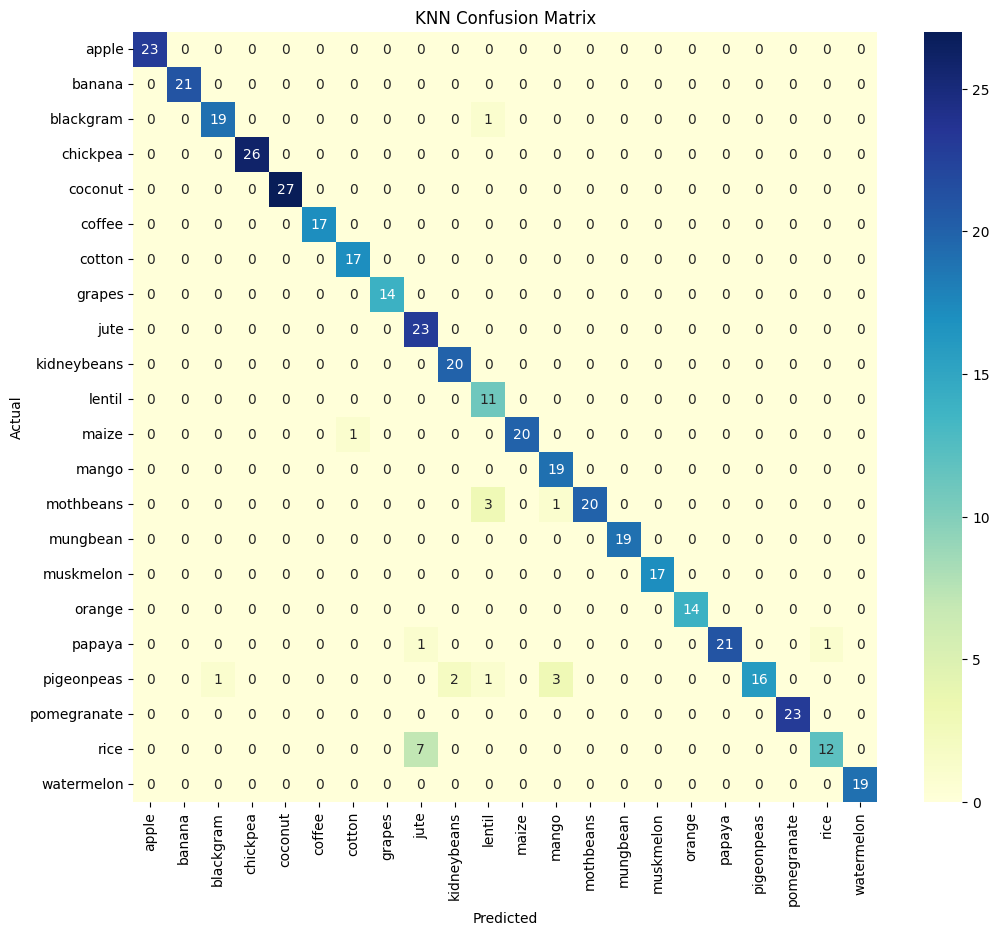

In [17]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🔍 Step 7: Tune the number of neighbors (k)
We try different values of k and plot accuracy to find the optimal value.

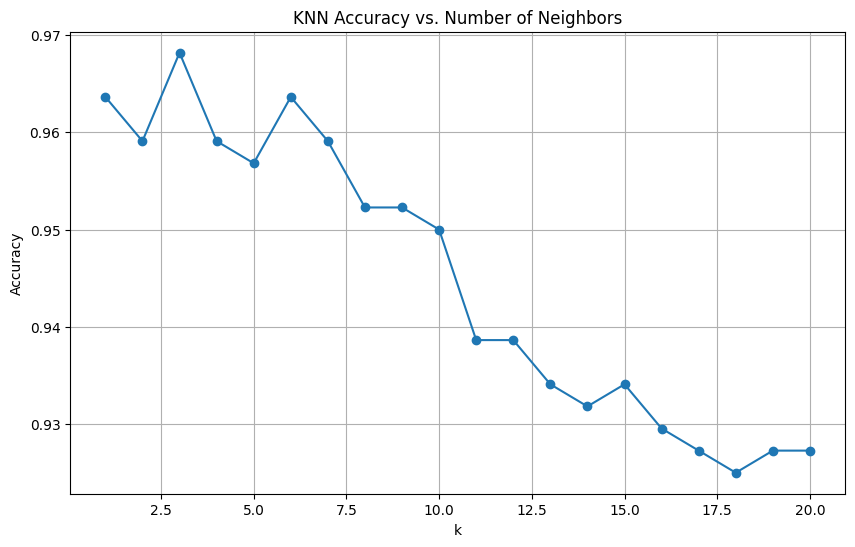

In [7]:
# Try different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## 📝 Reflection Questions

1. Why is feature scaling important for KNN?
2. How does changing k affect bias and variance?
3. What are the limitations of KNN in agriculture?
4. How could you use this model to support farmers in crop planning?